# Predicting Sales Revenue using Simple Linear Regression

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading DataSet

In [2]:
df = pd.read_csv("Advertising.csv ")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


#### Removing index Column

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace =True)

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### Visualizing the features

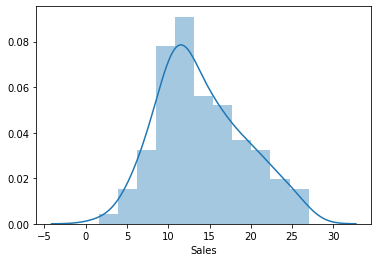

In [6]:
import seaborn as sns
sns.distplot(df.Sales)

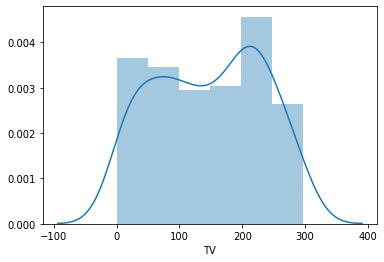

In [7]:
sns.distplot(df.TV)

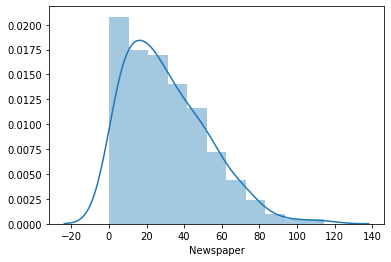

In [8]:
sns.distplot(df.Newspaper)

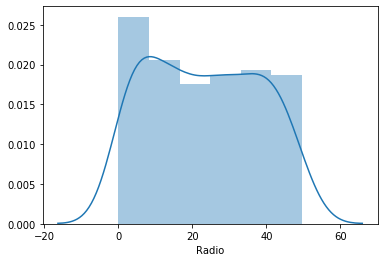

In [9]:
sns.distplot(df.Radio)

#### Relationship between Target and Features

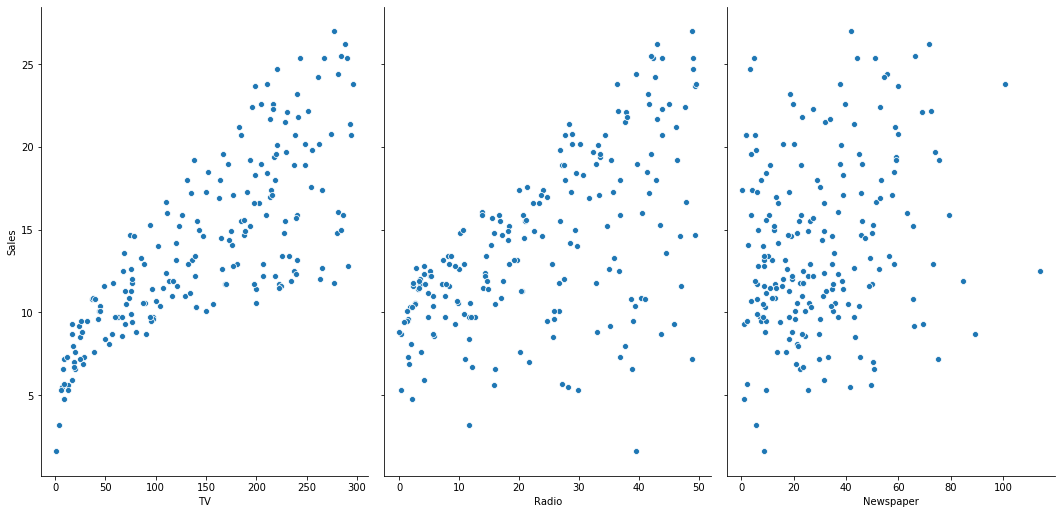

In [10]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars=['Sales'], height=7,
             aspect = 0.7)

In [11]:
df['TV'].corr(df.Sales)

0.7822244248616066

In [12]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


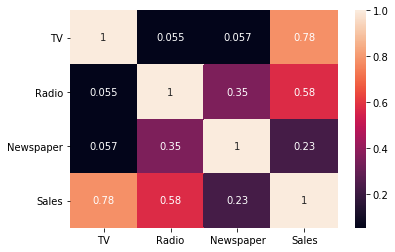

In [13]:
sns.heatmap(df.corr(),annot = True)

# Creating Simple Linear Regression Model

In [14]:
X = df[['TV']]
X.head(2)

,TV
0,230.1
1,44.5


In [15]:
y = df.Sales
y.head(2)

0    22.1
1    10.4
Name: Sales, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1)


In [17]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(lm.intercept_)

6.91197261886872


In [19]:
print(lm.coef_)

[0.04802945]


In [20]:
y_pred = lm.predict(X_test)
y_pred[:5]

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

## Model Evaluation Metrics

In [21]:
from sklearn import metrics

print(metrics.mean_absolute_error(y_test,y_pred))

2.4643080986027908


In [22]:
print(metrics.mean_squared_error(y_test,y_pred))

10.310069587813155


In [23]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

3.210929707703542


In [24]:
from sklearn.metrics import r2_score

print("r^2 score:",r2_score(y_test,y_pred))

r^2 score: 0.5590828580007852
